<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/day43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
    n_clusters_per_class=1, random_state=42
)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42
)
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42
)
gboost = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgboost = xgboost = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)


In [9]:
bagging.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
gboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [10]:
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))
adaboost_acc = accuracy_score(y_test, adaboost.predict(X_test))
gboost_acc = accuracy_score(y_test, gboost.predict(X_test))
xgboost_acc = accuracy_score(y_test, xgboost.predict(X_test))

In [11]:
print(f"Bagging Accuracy: {bagging_acc * 100:.1f}%")
print(f"AdaBoost Accuracy: {adaboost_acc * 100:.1f}%")
print(f"Gradient Boosting Accuracy: {gboost_acc * 100:.1f}%")
print(f"XGBoost Accuracy: {xgboost_acc * 100:.1f}%")

Bagging Accuracy: 97.5%
AdaBoost Accuracy: 95.5%
Gradient Boosting Accuracy: 97.5%
XGBoost Accuracy: 97.5%


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [15]:
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    importances = model.feature_importances_
    df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    df = df.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df, palette='viridis')
    plt.title(title)
    plt.tight_layout()
    plt.show()


<ipython-input-15-892d454a5520>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df, palette='viridis')


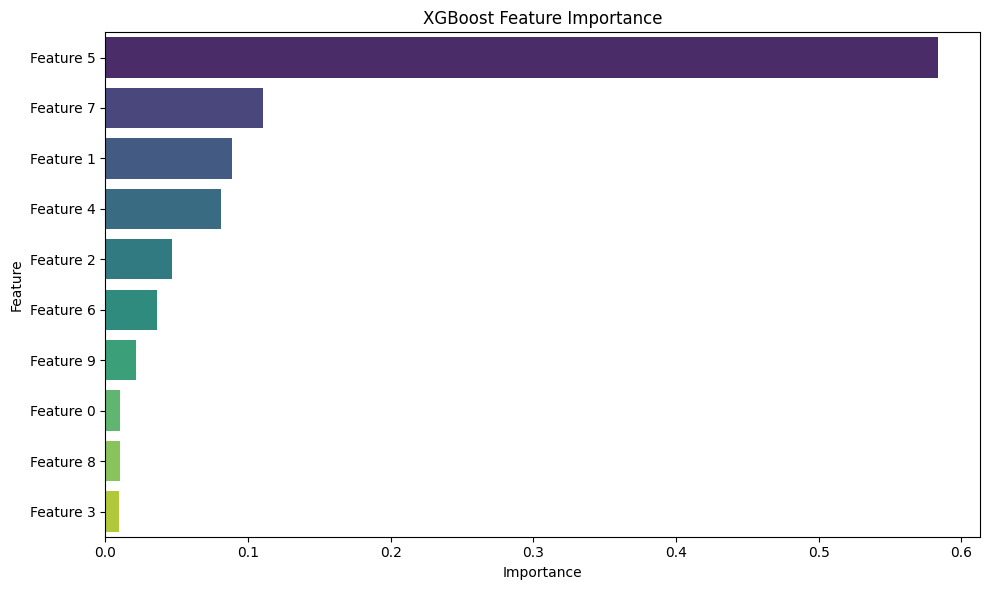

In [16]:
plot_feature_importance(xgboost, feature_names=[f"Feature {i}" for i in range(X.shape[1])], title="XGBoost Feature Importance")

In [19]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


In [20]:
X_2d, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, random_state=42
)

In [21]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [22]:
model.fit(X_2d, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

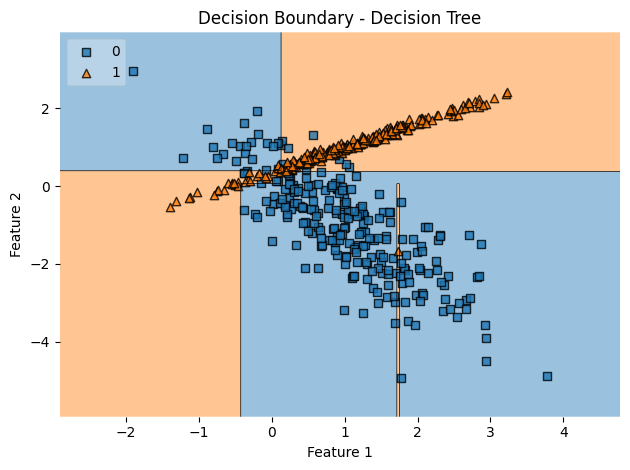

In [23]:
plot_decision_regions(X_2d, y, clf=model, legend=2)
plt.title("Decision Boundary - Decision Tree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()